In [170]:
import gymnasium as gym
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

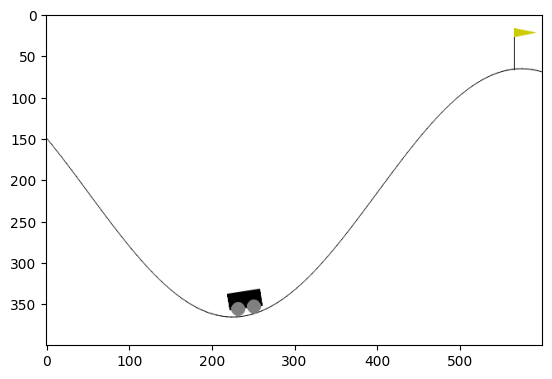

In [171]:
# Create the environment
env = gym.make('MountainCar-v0', render_mode='rgb_array')
env.reset()
plt.imshow(env.render())

In [172]:
# Action Space in MountainCar environment
print('Action Space: ', env.action_space)

Action Space:  Discrete(3)


In [173]:
# 1= push left, 2= no push, 3= push right

In [174]:
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

In [175]:
# Since in this  environment, position and velocity are continuous value. RL algorithm works only with discrete values.
# I need to split them into categories like bin.
# For better managing, I am gonna use 40 bins for velocity and 60 bins for position, I think this is enough to cover the whole range
# More bins need more time.

# Setting the number of bins for position and velocity
position_bins_value = 60
velocity_bins_value = 40


# In this environment, the observation space is 2D box, index 0 is X coordinate (position)  and index 1 is velocity (Y coordinate).
# .low is  NumPY array to stores the minimum value of the observation space and .high is the maximum value of the observation space.

# Define the range of position and velocity
position_min = env.observation_space.low[0]
position_max = env.observation_space.high[0]
velocity_min = env.observation_space.low[1] 
velocity_max = env.observation_space.high[1]


# For creating the bins, np.linspace is used to create evenly spaced values  between start and stop
# Create the bins for position and velocity
position_bins = np.linspace(position_min, position_max, position_bins_value)
velocity_bins = np.linspace(velocity_min, velocity_max, velocity_bins_value)
# Position ranges from -1.2 to 0.6 and I ued 60 bins
print(f'Each bin has a width  for position(X-coordinate) : {(position_max - position_min) / position_bins_value:.4f}')
print(f'Each bin has a width for velocity(Y-coordinate): {(velocity_max - velocity_min) / velocity_bins_value:.4f}')

print(f'Position Bins: {len(position_bins)}')
print(f'Velocity Bins: {len(velocity_bins)}')

# NOTE: I got the code structure from lecture notes

Each bin has a width  for position(X-coordinate) : 0.0300
Each bin has a width for velocity(Y-coordinate): 0.0035
Position Bins: 60
Velocity Bins: 40


In [176]:
# Define the Q table
Q_table = np.zeros((position_bins_value, velocity_bins_value, env.action_space.n))
Q_table.shape
# (60, 40, 3

(60, 40, 3)

**Q_table has 2400 states and 3 actions**

In [177]:
# Q-learning function, I need a function to update the Q value based on the Bellman equation 
# Q[s, a] = Q[s, a] + α * (reward + γ * max(Q[next_s]) - Q[s, a])

def calculate_Q (Q, state, action, reward, next_state, alpha, gamma):
    Q[state[0], state[1], action] = Q[state[0], state[1], action] + alpha * (reward  + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
    return Q

# Q[state[0], state[1], action] =  the current Q value for the current position, velocity and action
# (reward  + gamma * np.max(Q[next_state[0], next_state[1]]) = calculating the target value
# Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action] = the difference between the target value and the current Q value

# NOTE: I got function from lecture notes

In [178]:
# Since bins create intervals, I need to use np.digitize to find the index of the bin that contains the value.
def get_state(observation):
    position = np.digitize(observation[0], bins=position_bins) - 1
    velocity = np.digitize(observation[1], bins=velocity_bins) - 1
    return position, velocity

# NOTE: I got function from lecture notes 

In [179]:
print('Position Bins Intervals:')
for i in range(len(position_bins) - 1):
    print(f'Bin {i}: [{position_bins[i]:.2f}, {position_bins[i+1]:.2f})')

# NOTE: This is my own idea to print the intervals of the bins for better understanding.


Position Bins Intervals:
Bin 0: [-1.20, -1.17)
Bin 1: [-1.17, -1.14)
Bin 2: [-1.14, -1.11)
Bin 3: [-1.11, -1.08)
Bin 4: [-1.08, -1.05)
Bin 5: [-1.05, -1.02)
Bin 6: [-1.02, -0.99)
Bin 7: [-0.99, -0.96)
Bin 8: [-0.96, -0.93)
Bin 9: [-0.93, -0.89)
Bin 10: [-0.89, -0.86)
Bin 11: [-0.86, -0.83)
Bin 12: [-0.83, -0.80)
Bin 13: [-0.80, -0.77)
Bin 14: [-0.77, -0.74)
Bin 15: [-0.74, -0.71)
Bin 16: [-0.71, -0.68)
Bin 17: [-0.68, -0.65)
Bin 18: [-0.65, -0.62)
Bin 19: [-0.62, -0.59)
Bin 20: [-0.59, -0.56)
Bin 21: [-0.56, -0.53)
Bin 22: [-0.53, -0.50)
Bin 23: [-0.50, -0.47)
Bin 24: [-0.47, -0.44)
Bin 25: [-0.44, -0.41)
Bin 26: [-0.41, -0.38)
Bin 27: [-0.38, -0.35)
Bin 28: [-0.35, -0.32)
Bin 29: [-0.32, -0.28)
Bin 30: [-0.28, -0.25)
Bin 31: [-0.25, -0.22)
Bin 32: [-0.22, -0.19)
Bin 33: [-0.19, -0.16)
Bin 34: [-0.16, -0.13)
Bin 35: [-0.13, -0.10)
Bin 36: [-0.10, -0.07)
Bin 37: [-0.07, -0.04)
Bin 38: [-0.04, -0.01)
Bin 39: [-0.01, 0.02)
Bin 40: [0.02, 0.05)
Bin 41: [0.05, 0.08)
Bin 42: [0.08, 0.11)
Bin

In [180]:
print('Velocity Bins Intervals:')
for i in range(len(velocity_bins) - 1):
    print(f'Bin {i}: [{velocity_bins[i]:.2f}, {velocity_bins[i+1]:.2f})')

Velocity Bins Intervals:
Bin 0: [-0.07, -0.07)
Bin 1: [-0.07, -0.06)
Bin 2: [-0.06, -0.06)
Bin 3: [-0.06, -0.06)
Bin 4: [-0.06, -0.05)
Bin 5: [-0.05, -0.05)
Bin 6: [-0.05, -0.04)
Bin 7: [-0.04, -0.04)
Bin 8: [-0.04, -0.04)
Bin 9: [-0.04, -0.03)
Bin 10: [-0.03, -0.03)
Bin 11: [-0.03, -0.03)
Bin 12: [-0.03, -0.02)
Bin 13: [-0.02, -0.02)
Bin 14: [-0.02, -0.02)
Bin 15: [-0.02, -0.01)
Bin 16: [-0.01, -0.01)
Bin 17: [-0.01, -0.01)
Bin 18: [-0.01, -0.00)
Bin 19: [-0.00, 0.00)
Bin 20: [0.00, 0.01)
Bin 21: [0.01, 0.01)
Bin 22: [0.01, 0.01)
Bin 23: [0.01, 0.02)
Bin 24: [0.02, 0.02)
Bin 25: [0.02, 0.02)
Bin 26: [0.02, 0.03)
Bin 27: [0.03, 0.03)
Bin 28: [0.03, 0.03)
Bin 29: [0.03, 0.04)
Bin 30: [0.04, 0.04)
Bin 31: [0.04, 0.04)
Bin 32: [0.04, 0.05)
Bin 33: [0.05, 0.05)
Bin 34: [0.05, 0.06)
Bin 35: [0.06, 0.06)
Bin 36: [0.06, 0.06)
Bin 37: [0.06, 0.07)
Bin 38: [0.07, 0.07)


In [181]:
# Initialize the current environment state
observation, _ = env.reset() 
position_idx, velocity_idx = get_state(observation)

print(f'Position bin index: {position_idx}') 
print(f'Velocity bin index: {velocity_idx}')  

# NOTE: The code structure is my own idea, but I forgot to use underscore and I got an error to ignore the second value
# I used LLM to ask about the error 

Position bin index: 21
Velocity bin index: 19


In [182]:
observation

array([-0.5348654,  0.       ], dtype=float32)

In [183]:
# Position bin index is 24 and velocity bin index is 19 
# The observation is array([-0.44456923,  0.]), which means the position is -0.44456923 and velocity is 0.0
# Position range: [-1.2] minimum to [0.6] maximum
# Velocity range: [-0.07] minimum to [0.07] maximum

# Number of bins :60
# Previously I print the bin width for position and velocity
# That is (0.03) for position and (0.004) for velocity

# Observation value for position is -0.44456923 
# I can find the bin
# the first bin starts at -1.2 and each bin has a width of 0.03 which means each time bin increases by 0.03
# 24*0.03 = 0.72
# -1.2 + 0.72 = -0.48
# Bins show the range of values and bin has start edge and end edge
# # For calculating the end edge of the bin, I need to add the bin width 
# -0.48 + 0.03 = -0.45, mmm well, almost the same as the observation value

# For velocity, same thing, the first bin starts at -0.07 and each bin has a width of 0.004 which means each time bin increases by 0.004

# Now I can understand deeply why having more bins is better

# NOTE: Each time I run the code, the observation value is different. When I push the notebook to github, the observation value is different.

In [184]:
# Hyperparameters
total_episodes = 15000
max_steps = 200
learning_rate = 0.2
gamma = 0.99
epsilon = 0.9
max_epsilon = 0.9
min_epsilon = 0.0
decay_rate = 0.003


In [185]:
reward_list = []

# Loop for training the agent
for episode in range(total_episodes):
        state, __ = env.reset()
        state = get_state(state)
        done = False
        total_reward = 0
        # Loop for each step in the episode
        for step in range(max_steps):
            
            # Explore or exploit
            if np.random.uniform(0, 1)> epsilon:
                action = np.argmax(Q_table[state[0], state[1]])
            else:
                action = env.action_space.sample()
                
            # Take action in the environment
            new_state, reward, done, truncated, __ = env.step(action)
            # Extract position 
            position = new_state[0]
            # Discretize the new state
            new_state = get_state(new_state)
            if done and position >= 0.5:
                reward = 150
                Q_table = calculate_Q(Q_table, state, action, reward, new_state, learning_rate, gamma)
                total_reward += reward
                print(f'Episode {episode} done, steps needed {step}, rewards: {total_reward:.3f}, epsilon: {epsilon:.3f}')
                break  
               
            Q_table = calculate_Q(Q_table, state, action, reward, new_state, learning_rate, gamma)
            state = new_state
            total_reward = total_reward + reward
        
        reward_list.append(total_reward)
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
# NOTE : I got the code structure from lecture notes 

Episode 1667 done, steps needed 170, rewards: -20.000, epsilon: 0.006
Episode 1718 done, steps needed 170, rewards: -20.000, epsilon: 0.005
Episode 1731 done, steps needed 174, rewards: -24.000, epsilon: 0.005
Episode 1772 done, steps needed 171, rewards: -21.000, epsilon: 0.004
Episode 1778 done, steps needed 155, rewards: -5.000, epsilon: 0.004
Episode 1783 done, steps needed 172, rewards: -22.000, epsilon: 0.004
Episode 1803 done, steps needed 193, rewards: -43.000, epsilon: 0.004
Episode 1826 done, steps needed 172, rewards: -22.000, epsilon: 0.004
Episode 1834 done, steps needed 162, rewards: -12.000, epsilon: 0.004
Episode 1866 done, steps needed 168, rewards: -18.000, epsilon: 0.003
Episode 1871 done, steps needed 197, rewards: -47.000, epsilon: 0.003
Episode 1897 done, steps needed 161, rewards: -11.000, epsilon: 0.003
Episode 1918 done, steps needed 195, rewards: -45.000, epsilon: 0.003
Episode 1924 done, steps needed 182, rewards: -32.000, epsilon: 0.003
Episode 1930 done, st

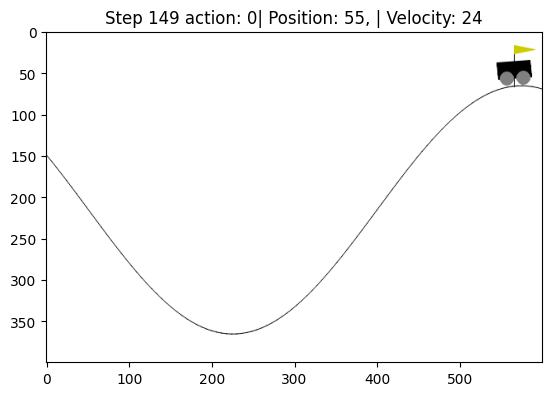

total_rewards: -150.0


In [200]:
total_test_episodes = 2

env.reset()
clear_output(wait=True)
plt.imshow(env.render())
plt.show()
for episode in range(total_test_episodes):
    state, __ = env.reset()
    position, velocity = get_state(state)
    done = False
    total_rewards = 0
    

    for step in range(max_steps):
        action = np.argmax(Q_table[int(state[0]), int(state[1])])
        observation, reward, done, truncated, __ = env.step(action)
        observation = get_state(observation)
        total_rewards = total_rewards + reward

        clear_output(wait=True)
        plt.imshow(env.render())
        plt.title(f'Step {step} action: {action}| Position: {observation[0]}, | Velocity: {observation[1]}')
        plt.pause(0.01)  
        plt.show()
        if done:
            print(f'total_rewards: {total_rewards}')
            time.sleep(2)
            break
        state = observation
env.close()
# NOTE: I got the code structure from lecture notes